In [109]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

Dimensional Params

In [110]:
k_on1 = 1e5
A_01 = 1e-10
k_on = k_on1*A_01
rho_T1 = 1e5
alpha = 3
k_off = 1e-4
q_on1 = 6.5e3
q_on = q_on1*A_01
q_off = 4.7e-3
rho_N1 = 2.2e5
beta = 5 

Dimensionless Params

In [111]:
A_0 = (172635*A_01*1.85e-18)/1.66e-24
rho_T = rho_T1/beta
rho_N = rho_N1/alpha
n_1 = k_on*rho_T*(1/q_off)
n_2 = k_off/q_off
v = q_on*(1/q_off)*rho_N
delta = rho_T/rho_N
N_r0 = ((A_01/5e-7)**2)/(0.1**2 + (A_01/5e-7)**2)
T_r0 = ((A_01/5e-7)**2)/(0.1**2 + (A_01/5e-7)**2)

Model

In [112]:
def model(t, z):

    dAdt = n_2*z[1] + (z[2]/delta) - v*(1 - z[2] - delta*z[3])*z[0] - n_1*(1 - z[1] - z[3])*z[0]
    dT_radt = n_1*(1 - z[1] - z[3])*z[0] + z[3] - n_2*z[1] - v*(1 - z[2] - delta*z[3])*z[1]
    dN_radt = delta*v*(1 - z[2] - delta*z[3])*z[0] + n_2*delta*z[3] - z[2] - n_1*(1 - z[1] - z[3])*z[2]
    dB_dt = (n_1/delta)*(1 - z[1] - z[3])*z[2] + v*(1 - z[2] - delta*z[3])*z[1] - (n_2 + 1)*z[3]
    dzdt = [dAdt, dT_radt, dN_radt, dB_dt]

    return dzdt

In [113]:
z0 = [A_0/rho_T, T_r0, N_r0, 0]
t= np.geomspace(0.00000001, 100, 1000)
t_span = [0.00000001, 100]

z = solve_ivp(model, t_span, z0, method ='Radau', t_eval = t)



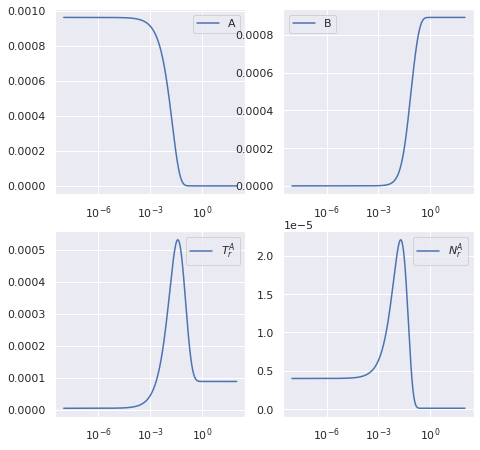

In [114]:
A = z.y[0]
T_ra = z.y[1]
N_ra = z.y[2]
B = z.y[3]
fig, axs = plt.subplots(2, 2, figsize=(7.5, 7.5))

axs[0][0].semilogx(t, A, label = 'A')
axs[0][1].semilogx(t, B, label = 'B')
axs[1][0].semilogx(t, T_ra, label = r'$T_r^A$')
axs[1][1].semilogx(t, N_ra, label = r'$N_r^A$')
axs[0][0].legend(loc = 'best')
axs[0][1].legend(loc = 'best')
axs[1][0].legend(loc = 'best')
axs[1][1].legend(loc = 'best')


In [115]:
N_array = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
T_array = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
B_array = np.zeros((21, 21))
t= np.geomspace(0.00000001, 100, 1000)
t_span = [0.00000001, 100]


for i in range(len(N_array)):
    for j in range(len(T_array)):

        # specify initial conditions
        z0 = [A_0/rho_T, T_array[j], N_array[i], 0]
        
        # calculate solution
        z = solve_ivp(model, t_span, z0, method ='Radau', t_eval = t)

        # extrcat B solution
        B = z.y[3]
        val = B[-1]
        B_array[i][j] = val
        

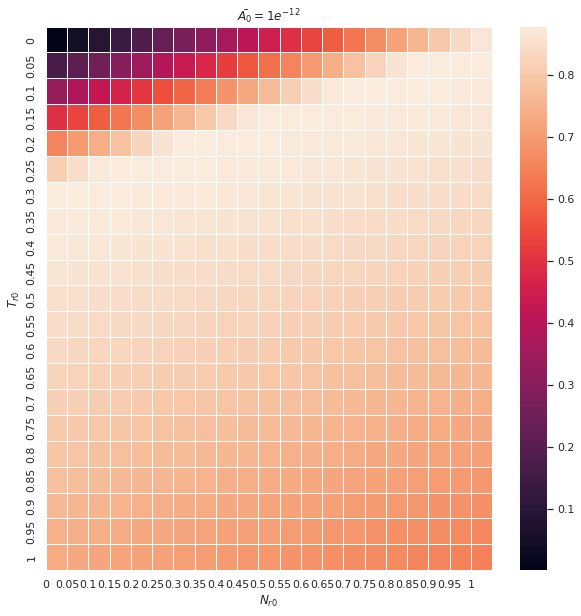

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(B_array, linewidth=.5, yticklabels=True, xticklabels=True, ax = ax)
ax.set_xticks(range(len(N_array)))
ax.set_yticklabels([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
ax.set_xticklabels([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
ax.set(xlabel = r'$N_{r0}$', ylabel=r'$T_{r0}$')
ax.set(title= r'$\bar{A_0} = 1e^{-12}$')
plt.show()

In [117]:
k_on1 = 1e5
A_01 = 1e-9
k_on = k_on1*A_01
rho_T1 = 1e5
alpha = 3
k_off = 1e-4
q_on1 = 6.5e3
q_on = q_on1*A_01
q_off = 4.7e-3
rho_N1 = 2.2e5
beta = 5 

A_0 = (172635*A_01*1.85e-18)/1.66e-24
rho_T = rho_T1/beta
rho_N = rho_N1/alpha
n_1 = k_on*rho_T*(1/q_off)
n_2 = k_off/q_off
v = q_on*(1/q_off)*rho_N
delta = rho_T/rho_N
Nr0 = 0#((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1)
Tr0 = ((A_01/4e-6)**2)/(0.0095**2 + (A_01/4e-6)**2)
C = A_0 + (Nr0*rho_N) + (Tr0*rho_T)
mu_T = C/rho_T
mu_N = C/rho_N

In [118]:
def model_reduc(t, z):

    dT = (n_1*(1 - z[0] - z[2])*(mu_T - z[0] - (z[1]/delta) - z[2])) + z[2] - (n_2*z[0]) -(v*(1 - z[1] - (delta*z[2]))*z[0])
    dN =(v*(1 - z[1] - (delta*z[2]))*(mu_N - (delta*z[0]) - z[1] - (delta*z[2]))) + (n_2*delta*z[2]) - z[1] -(n_1*(1 - z[0] - z[2])*z[1])
    dB = ((n_1/delta)*(1 - z[0] - z[2])*z[1]) + (v*(1 - z[1] - (delta*z[2]))*z[0]) - ((n_2 + 1)*z[2])
    dz = [dT, dN, dB]

    return dz

In [119]:
z0 = [Tr0, Nr0, 0]
t= np.geomspace(0.00000001, 100, 1000)
t_span = [0.00000001, 100]

z = solve_ivp(model_reduc, t_span, z0, method ='Radau', t_eval = t)


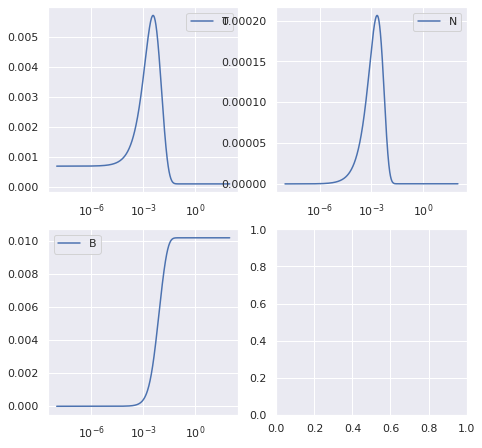

In [120]:
T = z.y[0]
N = z.y[1]
B = z.y[2]
fig, axs = plt.subplots(2, 2, figsize=(7.5, 7.5))

axs[0][0].semilogx(t, T, label = 'T')
axs[0][1].semilogx(t, N, label = 'N')
axs[1][0].semilogx(t, B, label = r'B')
axs[0][0].legend(loc = 'best')
axs[0][1].legend(loc = 'best')
axs[1][0].legend(loc = 'best')

Dimensional model params

In [121]:
k_on1 = 1e5
A_01 = 1e-8
k_on = k_on1*A_01
rho_T1 = 1e5
alpha = 3
k_off = 1e10
q_on1 = 6.5e3
q_on = q_on1*A_01
q_off = 4.7e-3
rho_N1 = 2.2e5
beta = 5
A_0 = (172635*A_01*1.85e-18)/1.66e-24
rho_T = rho_T1/beta
rho_N = rho_N1/alpha
Nr0 = 0.001*rho_N
Tr0 = ((A_01/4e-6)**2)/(0.0095**2 + (A_01/4e-6)**2)*rho_T
C = A_0 + (Nr0*rho_N) + (Tr0*rho_T)


In [122]:
def dimensional_reduced_model(t, z):

    dT = k_on*(rho_T - z[0] - z[2])*(C - z[0] - z[1] - z[2]) + q_off*z[2] - k_off*z[0] - q_on*(rho_N - z[1] - z[2])*z[0]
    dN = q_on*(rho_N - z[1] - z[2])*(C - z[0] - z[1] - z[2]) + k_off*z[2] - q_off*z[1] - k_on*(rho_T - z[0] - z[2])*z[1]
    dB = k_on*(rho_T - z[0] - z[2])*z[1] + q_on*(rho_N - z[1] - z[2])*z[0] - (k_off + q_off)*z[2]
    dz = [dT, dN, dB]

    return dz

In [123]:
z0 = [Tr0, Nr0, 0]
t_start = 0.00000001*(1/q_off) 
t_fin = 100*(1/q_off)
t= np.geomspace(t_start, t_fin, 1000)
t_span = [t_start, t_fin]

z = solve_ivp(dimensional_reduced_model, t_span, z0, method ='Radau', t_eval = t)

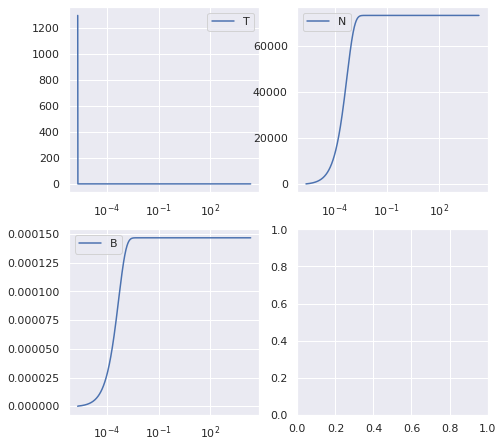

In [124]:
T = z.y[0]
N = z.y[1]
B = z.y[2]
fig, axs = plt.subplots(2, 2, figsize=(7.5, 7.5))

axs[0][0].semilogx(t, T, label = 'T')
axs[0][1].semilogx(t, N, label = 'N')
axs[1][0].semilogx(t, B, label = r'B')
axs[0][0].legend(loc = 'best')
axs[0][1].legend(loc = 'best')
axs[1][0].legend(loc = 'best')

In [125]:
A0_array = [1e-12, 5e-12, 1e-11, 5e-11, 1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]


T_st = np.zeros(len(A0_array))
N_st = np.zeros(len(A0_array))
B_st = np.zeros(len(A0_array))

for i, A_01 in enumerate(A0_array):

        # new dimensional params
        k_on = k_on1*A_01
        q_on = q_on1*A_01
        A_0 = (172635*A_01*1.85e-18)/1.66e-24
        C = A_0 + (Nr0*rho_N) + (Tr0*rho_T)
        z0 = [Tr0, Nr0, 0]

        z = solve_ivp(dimensional_reduced_model, t_span, z0, method ='Radau', t_eval = t)

        T = z.y[0]
        N = z.y[1]
        B = z.y[2]

        T_st[i] = T[-1]
        N_st[i] = N[-1]
        B_st[i] = B[-1]

[Text(0.5, 1.0, '$B$')]

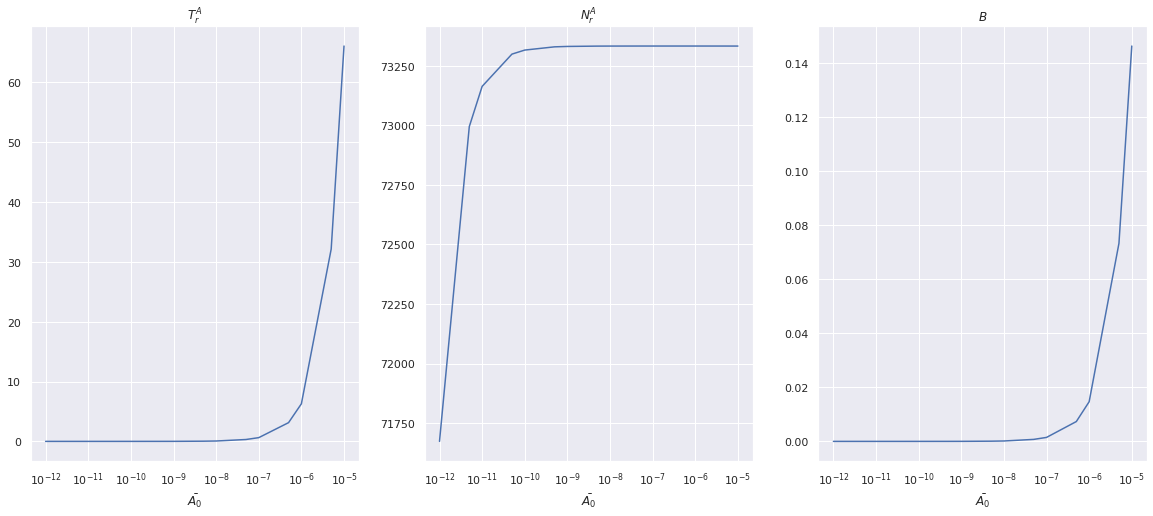

In [126]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

sns.set_theme()

axs[0].semilogx(A0_array, T_st)
axs[1].semilogx(A0_array, N_st)
axs[2].semilogx(A0_array, B_st)
axs[0].set(xlabel = r'$\bar{A_0}$')
axs[1].set(xlabel = r'$\bar{A_0}$')
axs[2].set(xlabel = r'$\bar{A_0}$')
axs[0].set(title = r'$T_r^A$')
axs[1].set(title = r'$N_r^A$')
axs[2].set(title = r'$B$')